In [ ]:
# Installations
!pip install xgboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 21 kB/s 


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score #score evaluation

from matplotlib import pyplot

In [ ]:
# Connects to google-drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# File upload from GoogleDrive (FOR AMIT) into pandas DataFrame
df = pd.read_excel("/content/drive/MyDrive/Final Project Assets/BankersExtractedData.xlsx")
# X and Y process
y_df = df.iloc[:,-1].values
x_df = df.drop(['Unnamed: 0','ID','Filename','Neutral','Negative','Positive','Avg_Sentence_Duration',
                'Avg_Word_Duration','Avg_Sentence_Length','Label'], axis=1, inplace=False)

In [ ]:
# FOR MAAYAN
df= pd.read_excel('BankersExtractedData.xlsx', index_col=0, nrows=800)  
# X and Y process
y_df = df.iloc[:,-1].values
x_df = df.drop(['ID','Filename','Neutral','Negative','Positive','Avg_Sentence_Duration',
                'Avg_Word_Duration','Avg_Sentence_Length','Label'], axis=1, inplace=False)

In [ ]:


# Normalize with StandardScaler
stdsc = StandardScaler()
x_std = stdsc.fit_transform(x_df)

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x_std, y_df, test_size = 0.20)

In [ ]:
x_df

,Amp_Env_Avg,Amp_Env_Max,Amp_Env_Min,Amp_Env_STD,Amp_Env_Median,RMS_Avg,RMS_Max,RMS_Min,RMS_STD,RMS_Median,...,Mel_Spec_Avg,Mel_Spec_Max,Mel_Spec_Min,Mel_Spec_STD,Mel_Spec_Median,MFCC_Avg,MFCC_Max,MFCC_Min,MFCC_STD,MFCC_Median
0,0.232228,1.000000,0.000000,0.202404,0.184454,0.095570,0.411436,0.000189,0.080235,0.078766,...,-62.897903,0.000000e+00,-80.0,20.202543,-74.073631,-11.845010,247.824310,-515.080383,93.832314,-5.679678
1,0.162277,0.786676,0.000397,0.154734,0.119144,0.068128,0.315310,0.000208,0.053911,0.056725,...,-63.458645,0.000000e+00,-80.0,20.179743,-76.002022,-19.615170,269.715027,-553.145325,102.348938,-9.692158
2,0.213533,1.000000,0.000061,0.185277,0.173223,0.093932,0.378381,0.000167,0.072756,0.091959,...,-61.106392,-9.536743e-07,-80.0,21.505651,-70.402420,-16.306370,271.638245,-523.852112,96.688957,-10.521614
3,0.169967,0.758965,0.000000,0.144814,0.139317,0.070031,0.281249,0.000000,0.054748,0.064375,...,-60.501175,0.000000e+00,-80.0,21.974392,-69.214996,-15.221334,273.893555,-520.208557,102.185715,-9.260939
4,0.287463,1.000000,0.000000,0.249509,0.227699,0.102054,0.333412,0.000000,0.078534,0.099253,...,-61.397247,0.000000e+00,-80.0,21.835417,-75.282799,-11.822542,272.060211,-583.335449,100.191246,-4.784217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.150195,0.759453,0.000458,0.127328,0.130589,0.066701,0.292678,0.000234,0.048948,0.064569,...,-62.760929,-9.536743e-07,-80.0,20.409882,-73.832565,-18.043478,259.005066,-582.620605,103.823891,-8.552083
796,0.144622,0.756310,0.000488,0.140118,0.104526,0.065323,0.361483,0.000217,0.068016,0.046197,...,-64.790230,0.000000e+00,-80.0,19.103430,-79.089035,-17.836552,245.646240,-492.991364,97.975983,-10.161787
797,0.346310,1.000000,0.000122,0.271863,0.328593,0.150767,0.393404,0.000146,0.114017,0.147704,...,-61.759876,9.536743e-07,-80.0,22.079647,-78.530594,-17.717953,237.008865,-523.681458,91.765930,-10.757504
798,0.116021,0.799249,-0.002594,0.116839,0.088107,0.054667,0.340224,0.000000,0.053240,0.043048,...,-66.887070,-9.536743e-07,-80.0,18.231882,-80.000000,-23.588491,237.373779,-563.329468,106.042503,-8.010136




---



# Json-Less Data Notebook
One of our main questions asked was how significant would be the physical features and data on the labels without taking into consideration any data involved from the trasncripts (JSON) files. This entire notebook is almost identical to notebook number 3 with the full dataset models, but here we experimented learning about the relation without involving the transcipts data at all. 
The results : The physical features extracted from the audio alone produced lower prediction rates by themselves with the models. But this notebooks results are of great importance and can be worked with and experimented far wider.

NOTE: The models were re-trained in a separated way, without any relation to the training done in notebook number 3.

In [ ]:
# K-Fold Models testing

kfold = KFold(n_splits=5)
Means=[]
accuracy=[]
std=[]
classifiers = ['Random Forest Classifier',
               'Cat Boost Classifier',
               'XGBClassifier']

models = [RandomForestClassifier(n_estimators=100),
          CatBoostClassifier(iterations=20, learning_rate=1, depth=2),
          XGBClassifier(objective='binary:logistic',nthread=4,seed=42)]

for i in models:
    model = i
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    Means.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe=pd.DataFrame({'CV Mean':Means,'Std':std},index=classifiers)  
models_dataframe 

0:	learn: 0.6793716	total: 48.8ms	remaining: 928ms
1:	learn: 0.6546748	total: 50.7ms	remaining: 456ms
2:	learn: 0.6387083	total: 52.3ms	remaining: 296ms
3:	learn: 0.6159694	total: 54.3ms	remaining: 217ms
4:	learn: 0.6028497	total: 57ms	remaining: 171ms
5:	learn: 0.5880060	total: 59.2ms	remaining: 138ms
6:	learn: 0.5800923	total: 61.6ms	remaining: 114ms
7:	learn: 0.5657322	total: 63.9ms	remaining: 95.8ms
8:	learn: 0.5472422	total: 65.8ms	remaining: 80.4ms
9:	learn: 0.5331444	total: 68ms	remaining: 68ms
10:	learn: 0.5225415	total: 70.4ms	remaining: 57.6ms
11:	learn: 0.5058060	total: 73.4ms	remaining: 48.9ms
12:	learn: 0.5000978	total: 76.4ms	remaining: 41.1ms
13:	learn: 0.4906575	total: 78.4ms	remaining: 33.6ms
14:	learn: 0.4838907	total: 84.1ms	remaining: 28ms
15:	learn: 0.4683965	total: 87.9ms	remaining: 22ms
16:	learn: 0.4580012	total: 89.7ms	remaining: 15.8ms
17:	learn: 0.4493650	total: 92ms	remaining: 10.2ms
18:	learn: 0.4342881	total: 93.9ms	remaining: 4.94ms
19:	learn: 0.4235230	t

,CV Mean,Std
Random Forest Classifier,0.631250,0.045393
Cat Boost Classifier,0.592187,0.032174
XGBClassifier,0.621875,0.041810




---



In [ ]:
# XGBoost Hyperparameters Tuning

XGB_parameters = {'gamma': [0.01,0.05,0.1,0.2,0.5,1,1.5,2,2.5,3,3.5,5,10],
              'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2,0.25,0.3,0.35,0.4, 0.5,0.55,0.6,0.75],
              'max_depth': [2,3,4,5,6,7,8,9,10,11,12],
              'n_estimators': [4,6,8,9,10,15,20,35,50,65,80,100]
             }

XGB=XGBClassifier(n_jobs=-1)

xgb_grid = GridSearchCV(estimator=XGB, param_grid=XGB_parameters, n_jobs=-1, cv=2, scoring='roc_auc')
xgb_grid.fit(x_train,y_train)


print("Results from Grid Search XGboost:\n")
print(f"\n The best score across ALL searched params:\n{xgb_grid.best_score_}\n")
print(f"\n The best parameters across ALL searched params:\n{xgb_grid.best_params_}\n")

Results from Grid Search XGboost:


 The best score across ALL searched params:
0.7192492362718526


 The best parameters across ALL searched params:
{'gamma': 0.1, 'learning_rate': 0.15, 'max_depth': 10, 'n_estimators': 100}



for XGBoost model:
 Train Accuracy:  100.0 ; Test Accuracy: 60.62499999999999

Train Matrix:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       331
         1.0       1.00      1.00      1.00       309

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640


Test Matrix:
              precision    recall  f1-score   support

         0.0       0.54      0.58      0.56        69
         1.0       0.66      0.63      0.64        91

    accuracy                           0.61       160
   macro avg       0.60      0.60      0.60       160
weighted avg       0.61      0.61      0.61       160




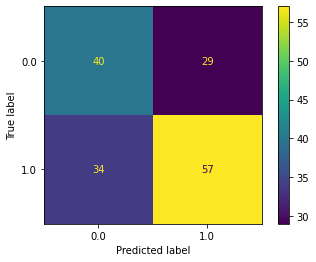

In [ ]:
# XGBoost Best Params : Classification-Report & Confusion-Matrix

XGB = XGBClassifier(n_jobs=-1,gamma=0.1, learning_rate=0.15 , max_depth=10,n_estimators=100).fit(x_train,y_train)

xgb_predict_train = XGB.predict(x_train)
train_accuracy = accuracy_score(y_train,xgb_predict_train)*100

xgb_predict_test = XGB.predict(x_test)
test_accuracy = accuracy_score(y_test,xgb_predict_test)*100

print(f"for XGBoost model:\n Train Accuracy:  {train_accuracy} ; Test Accuracy: {test_accuracy}\n")

print(f"Train Matrix:\n{classification_report(y_train,xgb_predict_train)}\n")
print(f"Test Matrix:\n{classification_report(y_test,xgb_predict_test)}\n")

confusion_matrix = metrics.confusion_matrix(y_test,xgb_predict_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0.0, 1.0])

cm_display.plot()
plt.show()

Feature: 0, Score: 0.04011
Feature: 1, Score: 0.04229
Feature: 2, Score: 0.05506
Feature: 3, Score: 0.03603
Feature: 4, Score: 0.03811
Feature: 5, Score: 0.04684
Feature: 6, Score: 0.04787
Feature: 7, Score: 0.03305
Feature: 8, Score: 0.03574
Feature: 9, Score: 0.06062
Feature: 10, Score: 0.04278
Feature: 11, Score: 0.03893
Feature: 12, Score: 0.02932
Feature: 13, Score: 0.04693
Feature: 14, Score: 0.04239
Feature: 15, Score: 0.04098
Feature: 16, Score: 0.04609
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.03487
Feature: 19, Score: 0.02598
Feature: 20, Score: 0.03480
Feature: 21, Score: 0.04420
Feature: 22, Score: 0.05062
Feature: 23, Score: 0.04666
Feature: 24, Score: 0.03975


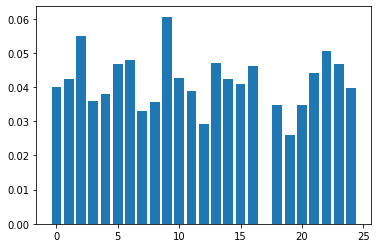

In [ ]:
# get feature importance for XGB model
importance = XGB.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



---



In [ ]:
# CatBoost Hyperparameters Tuning

Cat_parameters = {'depth'         : [2,3,4,5,6,7,8,9,10],
                 'learning_rate' : [0.0001,0.001,0.01,0.1,1,1.2,1.5,2,2.5],
                  'iterations'    : [4,6,8,10,20,30,40,50,60,70,80,90,100]}

CBC = CatBoostClassifier()
cbc_grid = GridSearchCV(estimator=CBC, param_grid = Cat_parameters, cv = 2, n_jobs=-1)
cbc_grid.fit(x_train,y_train)


print("\nResults from Grid Search CatBoost:\n")
print(f"\n The best score across ALL searched params:\n{cbc_grid.best_score_}\n")
print(f"\n The best parameters across ALL searched params:\n{cbc_grid.best_params_}\n")

0:	learn: 0.6721428	total: 56.5ms	remaining: 5.03s
1:	learn: 0.6492672	total: 106ms	remaining: 4.67s
2:	learn: 0.6364717	total: 155ms	remaining: 4.48s
3:	learn: 0.6201087	total: 203ms	remaining: 4.36s
4:	learn: 0.6042106	total: 251ms	remaining: 4.26s
5:	learn: 0.5921222	total: 303ms	remaining: 4.24s
6:	learn: 0.5799171	total: 352ms	remaining: 4.18s
7:	learn: 0.5679595	total: 401ms	remaining: 4.11s
8:	learn: 0.5545831	total: 460ms	remaining: 4.14s
9:	learn: 0.5446580	total: 513ms	remaining: 4.1s
10:	learn: 0.5364866	total: 563ms	remaining: 4.04s
11:	learn: 0.5243976	total: 612ms	remaining: 3.98s
12:	learn: 0.5157708	total: 661ms	remaining: 3.91s
13:	learn: 0.5088418	total: 711ms	remaining: 3.86s
14:	learn: 0.4988973	total: 764ms	remaining: 3.82s
15:	learn: 0.4924439	total: 823ms	remaining: 3.81s
16:	learn: 0.4864044	total: 872ms	remaining: 3.75s
17:	learn: 0.4790355	total: 920ms	remaining: 3.68s
18:	learn: 0.4710170	total: 973ms	remaining: 3.63s
19:	learn: 0.4662458	total: 1.02s	remaini

0:	learn: 0.6720680	total: 183ms	remaining: 16.3s
1:	learn: 0.6396155	total: 334ms	remaining: 14.7s
2:	learn: 0.6137888	total: 461ms	remaining: 13.4s
3:	learn: 0.5989996	total: 575ms	remaining: 12.4s
4:	learn: 0.5689685	total: 752ms	remaining: 12.8s
5:	learn: 0.5435616	total: 985ms	remaining: 13.8s
6:	learn: 0.5271254	total: 1.25s	remaining: 14.9s
7:	learn: 0.5040669	total: 1.44s	remaining: 14.8s
8:	learn: 0.4868657	total: 1.61s	remaining: 14.5s
9:	learn: 0.4729089	total: 1.77s	remaining: 14.2s
10:	learn: 0.4556593	total: 1.88s	remaining: 13.5s
11:	learn: 0.4447285	total: 2s	remaining: 13s
12:	learn: 0.4256662	total: 2.12s	remaining: 12.6s
13:	learn: 0.4135829	total: 2.3s	remaining: 12.5s
14:	learn: 0.4015752	total: 2.42s	remaining: 12.1s
15:	learn: 0.3891500	total: 2.55s	remaining: 11.8s
16:	learn: 0.3760866	total: 2.67s	remaining: 11.5s
17:	learn: 0.3671197	total: 2.8s	remaining: 11.2s
18:	learn: 0.3585161	total: 2.92s	remaining: 10.9s
19:	learn: 0.3475780	total: 3.04s	remaining: 10.

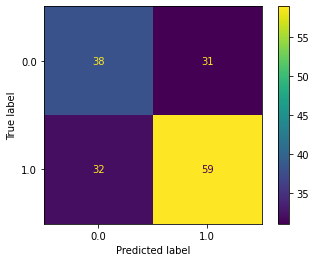

In [ ]:
# CatBoost Best Params : Classification-Report & Confusion-Matrix

CBC = CatBoostClassifier(depth=10, iterations=90 , learning_rate=0.1).fit(x_train,y_train)

cbc_predict_train=CBC.predict(x_train)
train_accuracy=accuracy_score(y_train,cbc_predict_train)*100

cbc_predict_test=CBC.predict(x_test)
test_accuracy=accuracy_score(y_test,cbc_predict_test)*100

print(f"for CatBoost model:\Train Accuracy: {train_accuracy} ; Test Accuracy: {test_accuracy}\n")

print(f"Train Matrix:\n{classification_report(y_train,cbc_predict_train)}\n")
print(f"Test Matrix:\n{classification_report(y_test,cbc_predict_test)}\n")

confusion_matrix = metrics.confusion_matrix(y_test,cbc_predict_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0.0, 1.0])

cm_display.plot()
plt.show()

Feature: 0, Score: 2.83341
Feature: 1, Score: 5.62903
Feature: 2, Score: 3.11355
Feature: 3, Score: 3.35370
Feature: 4, Score: 2.68034
Feature: 5, Score: 1.04445
Feature: 6, Score: 4.12964
Feature: 7, Score: 3.04323
Feature: 8, Score: 3.40610
Feature: 9, Score: 5.95846
Feature: 10, Score: 4.63370
Feature: 11, Score: 6.29241
Feature: 12, Score: 2.00646
Feature: 13, Score: 6.72095
Feature: 14, Score: 3.14850
Feature: 15, Score: 2.36367
Feature: 16, Score: 2.04078
Feature: 17, Score: 0.00000
Feature: 18, Score: 3.28757
Feature: 19, Score: 3.92214
Feature: 20, Score: 4.59936
Feature: 21, Score: 7.21491
Feature: 22, Score: 6.81894
Feature: 23, Score: 6.81553
Feature: 24, Score: 4.94317


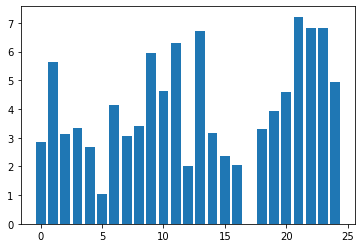

In [ ]:
# get feature importance for CBC model
importance = CBC.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



---



In [ ]:
# MLPClassifier (Neural Network) Hyperparameters tuning

clf_params = {'solver': ['lbfgs'],
              'max_iter': [2,4,8,10,20,50,100,200],
              'alpha': 10.0 ** -np.arange(1, 10),
              'hidden_layer_sizes':np.arange(10, 15),
              'random_state':[0,1,2,3,4,5,6,7,8,9]}

clf_grid = GridSearchCV(MLPClassifier(), clf_params, n_jobs=-1)

clf_grid.fit(x_train, y_train)

print("\nResults from Grid Search MLPClassifier:\n")
print(f"\n The best score across ALL searched params:\n{clf_grid.best_score_}\n")
print(f"\n The best parameters across ALL searched params:\n{clf_grid.best_params_}\n")


Results from Grid Search CatBoost:


 The best score across ALL searched params:
0.6908857161556946


 The best parameters across ALL searched params:
{'alpha': 0.001, 'hidden_layer_sizes': 14, 'max_iter': 50, 'random_state': 2, 'solver': 'lbfgs'}



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


for MLPClassifier model:\Train Accuracy: 70.86035451794207 ; Test Accuracy: 62.86701208981002

Train Matrix:
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70      1152
         1.0       0.70      0.73      0.71      1161

    accuracy                           0.71      2313
   macro avg       0.71      0.71      0.71      2313
weighted avg       0.71      0.71      0.71      2313


Test Matrix:
              precision    recall  f1-score   support

         0.0       0.64      0.61      0.62       294
         1.0       0.62      0.65      0.63       285

    accuracy                           0.63       579
   macro avg       0.63      0.63      0.63       579
weighted avg       0.63      0.63      0.63       579




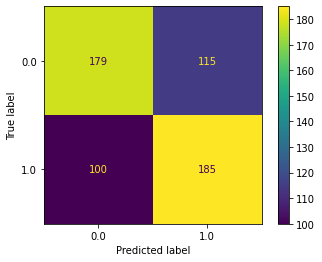

In [ ]:
# MLPClassifier Best Params : Classification-Report & Confusion-Matrix

clf = MLPClassifier(alpha=0.001, hidden_layer_sizes=(11,),solver='lbfgs', random_state=4, max_iter=20)
clf.fit(x_train, y_train)

clf_predict_train = clf.predict(x_train)
train_accuracy=accuracy_score(y_train,clf_predict_train)*100

clf_predict_test = clf.predict(x_test)
test_accuracy=accuracy_score(y_test,clf_predict_test)*100

print(f"for MLPClassifier model:\Train Accuracy: {train_accuracy} ; Test Accuracy: {test_accuracy}\n")

print(f"Train Matrix:\n{classification_report(y_train,clf_predict_train)}\n")
print(f"Test Matrix:\n{classification_report(y_test,clf_predict_test)}\n")

confusion_matrix = metrics.confusion_matrix(y_test,clf_predict_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0.0, 1.0])

cm_display.plot()
plt.show()



---



In [ ]:
# Keras Neural Network

model = Sequential()
model.add(Dense(12, input_shape=(25,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, batch_size=10)

_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
232/232 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5478
Epoch 2/30
232/232 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.5988
Epoch 3/30
232/232 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.6195
Epoch 4/30
232/232 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6450
Epoch 5/30
232/232 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.6541
Epoch 6/30
232/232 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6602
Epoch 7/30
232/232 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.6714
Epoch 8/30
232/232 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.6757
Epoch 9/30
232/232 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.6740
Epoch 10/30
232/232 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.6879



---



In [ ]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators':[10,50,100,200,350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,2,4,8,10,16,30,50,100],
    'criterion': ['gini', 'entropy']
}

rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

rfc_grid.fit(x_train, y_train)

print("\nResults from Grid Search Random Forest Classifier:\n")
print(f"\n The best score across ALL searched params:\n{rfc_grid.best_score_}\n")
print(f"\n The best parameters across ALL searched params:\n{rfc_grid.best_params_}\n")


Results from Grid Search CatBoost:


 The best score across ALL searched params:
0.6817994820154647


 The best parameters across ALL searched params:
{'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 100}



for Random Forest Classifier model:\Train Accuracy: 100.0 ; Test Accuracy: 64.375

Train Matrix:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       331
         1.0       1.00      1.00      1.00       309

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640


Test Matrix:
              precision    recall  f1-score   support

         0.0       0.57      0.70      0.63        69
         1.0       0.72      0.60      0.66        91

    accuracy                           0.64       160
   macro avg       0.65      0.65      0.64       160
weighted avg       0.66      0.64      0.65       160




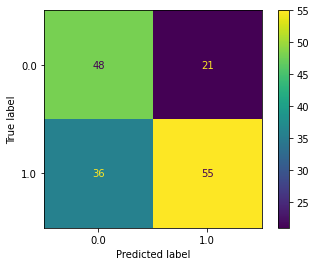

In [ ]:
# Random Forest Classifier Best Params : Classification-Report & Confusion-Matrix

rfc = RandomForestClassifier(criterion='gini',max_features='auto',max_depth=16,n_estimators=100,random_state=42)

rfc.fit(x_train, y_train)

rfc_predict_train = rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,rfc_predict_train)*100

rfc_predict_test = rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,rfc_predict_test)*100

print(f"for Random Forest Classifier model:\Train Accuracy: {train_accuracy} ; Test Accuracy: {test_accuracy}\n")

print(f"Train Matrix:\n{classification_report(y_train,rfc_predict_train)}\n")
print(f"Test Matrix:\n{classification_report(y_test,rfc_predict_test)}\n")

confusion_matrix = metrics.confusion_matrix(y_test,rfc_predict_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0.0, 1.0])

cm_display.plot()
plt.show()

Feature: 0, Score: 0.03817
Feature: 1, Score: 0.02493
Feature: 2, Score: 0.03849
Feature: 3, Score: 0.04389
Feature: 4, Score: 0.04442
Feature: 5, Score: 0.04160
Feature: 6, Score: 0.04493
Feature: 7, Score: 0.02911
Feature: 8, Score: 0.04072
Feature: 9, Score: 0.06088
Feature: 10, Score: 0.04553
Feature: 11, Score: 0.04445
Feature: 12, Score: 0.01241
Feature: 13, Score: 0.05046
Feature: 14, Score: 0.03007
Feature: 15, Score: 0.03833
Feature: 16, Score: 0.01071
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.05010
Feature: 19, Score: 0.02978
Feature: 20, Score: 0.04732
Feature: 21, Score: 0.05895
Feature: 22, Score: 0.05684
Feature: 23, Score: 0.06092
Feature: 24, Score: 0.05699


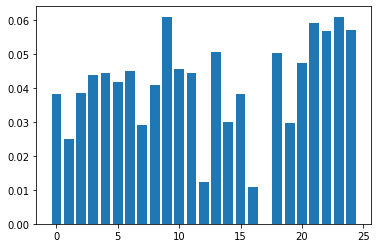

In [ ]:
# get feature importance for rfc model
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()